# BACCHANAL BUFFET RESTAURANT NLP HOMEWROK

Burada Bacchanal Buffet Restaurant hakkındaki yelp yorumlarını inceleyen NLP ödevini yapacağım.

In [139]:
import pandas as pd
import seaborn as sns
import nltk
import numpy as np
import matplotlib.pyplot as plt

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ramazan &
[nltk_data]     Selma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df=pd.read_csv("restaurant.csv")

In [143]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [144]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [145]:
df.shape

(10417, 10)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [147]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [148]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [149]:
df.sample(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1790,2506580,KGNA64tNaiF7KtvxItbaxg,yd6zkDcS53agCjJ2FUluTQ,RESDUcs7fIiihp38-d6_6g,1,1,0,0,Found something in my food it was gross it was...,2016-05-09 04:05:54
5909,2814780,2ILDsWFPSFtnRNSQpbAB-Q,lYmsHvPqYWmRS58v193TmQ,RESDUcs7fIiihp38-d6_6g,3,0,1,0,"It was worth a try, good selection but the Asi...",2014-03-11 07:13:22


### Dropping unnecessary columns

In [150]:
df.drop(columns=["Unnamed: 0", "review_id", "business_id","user_id"], inplace=True)

In [151]:
df.drop(columns=["funny", "cool","useful"], inplace=True)

In [153]:
df.head()

,stars,text,date
0,5,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


### Converting date column to useful columns

In [154]:
#create 3 columns that year and month and day and hour from date column and drop date column

df["year"] = pd.to_datetime(df["date"]).dt.year
df["month"] = pd.to_datetime(df["date"]).dt.month
df["day"] = pd.to_datetime(df["date"]).dt.day
df["hour"] = pd.to_datetime(df["date"]).dt.hour
df['day_of_week'] = pd.to_datetime(df["date"]).dt.day_of_week

# Drop date column
df.drop(columns=["date"], inplace=True)

In [155]:
df.head()

,stars,text,year,month,day,hour,day_of_week
0,5,After getting food poisoning at the Palms hote...,2012,12,4,3,1
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,17,0,4
2,4,The crab legs are better than the ones at Wick...,2015,6,8,18,0
3,1,Not worth it! Too salty food and expensive! Th...,2016,12,19,16,0
4,5,I would give this infinite stars if I could. M...,2015,7,28,7,1


## EDA - Exploratory Data Analysis 

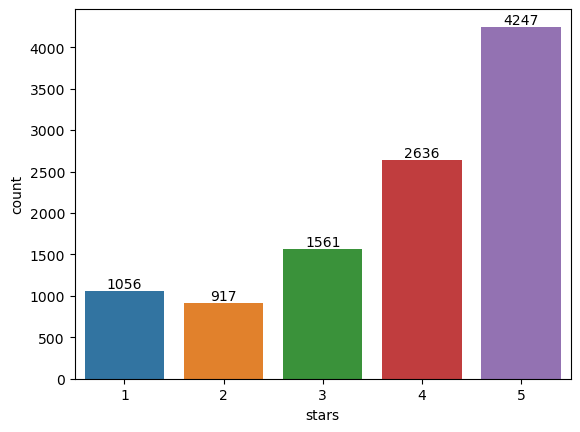

In [156]:
ax=sns.countplot(x=df['stars'])
ax.bar_label(ax.containers[0]); 

In [169]:
df.sample(2)

,stars,text,year,month,day,hour,day_of_week
1699,1,Four of us waited two hours in line on a Wed n...,2018,6,21,4,3
2079,3,I will start with all the cons for this one fi...,2013,7,18,7,3


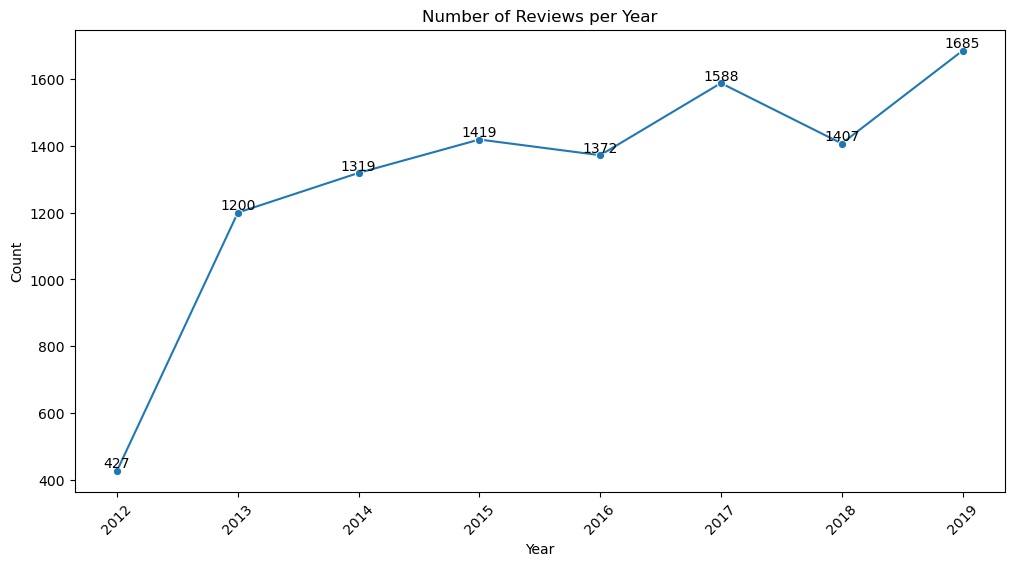

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yıllara göre veri sayısını hesaplama
yearly_counts = df['year'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(yearly_counts.index, yearly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Reviews per Year')
plt.xticks(rotation=45)  # X eksenindeki yılların daha iyi görünmesi için
plt.show()

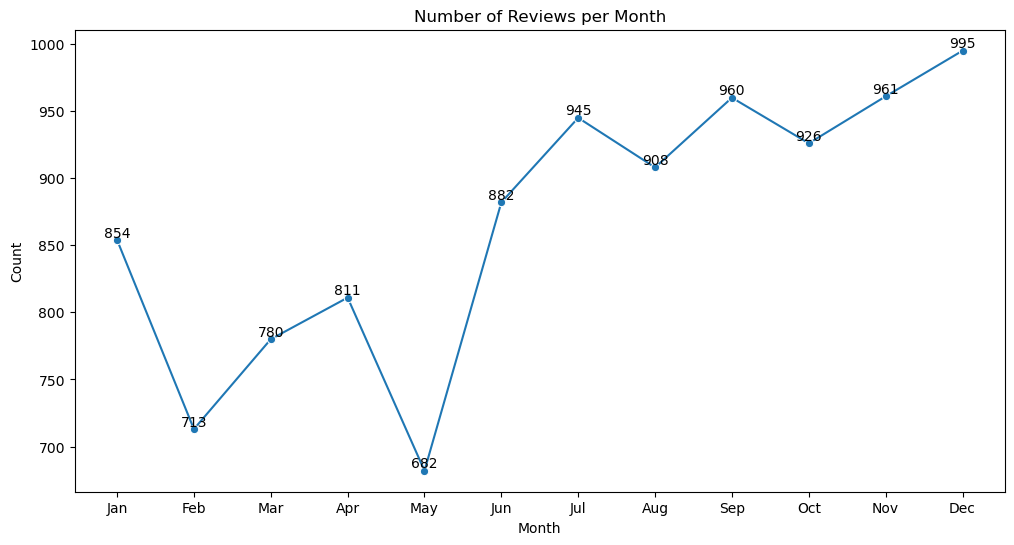

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aylara göre veri sayısını hesaplama
monthly_counts = df['month'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(monthly_counts.index, monthly_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Reviews per Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

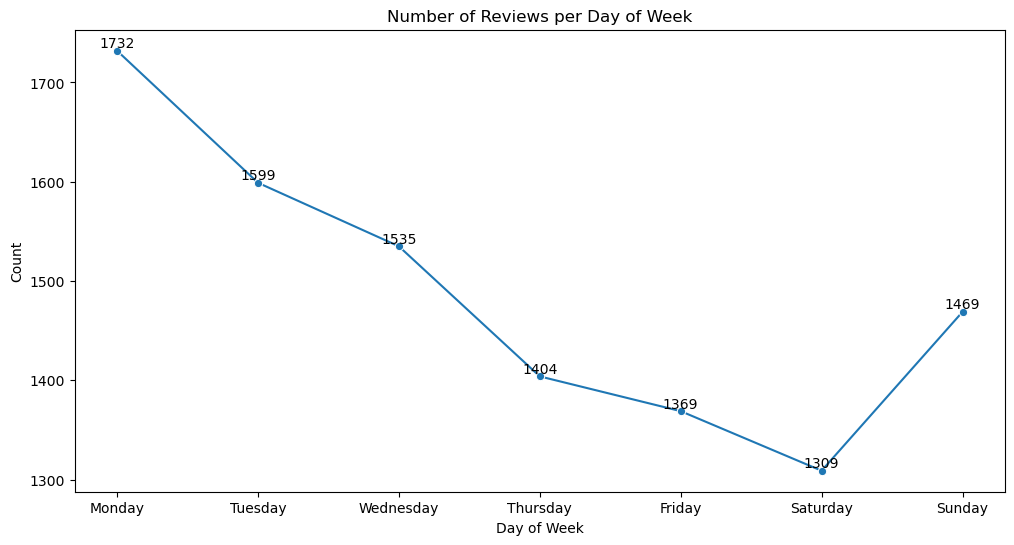

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Haftanın günlerine göre veri sayısını hesaplama
day_of_week_counts = df['day_of_week'].value_counts().sort_index()

# Gün adlarını belirleme
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(day_of_week_counts.index, day_of_week_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Reviews per Day of Week')
plt.xticks(ticks=range(7), labels=days)
plt.show()

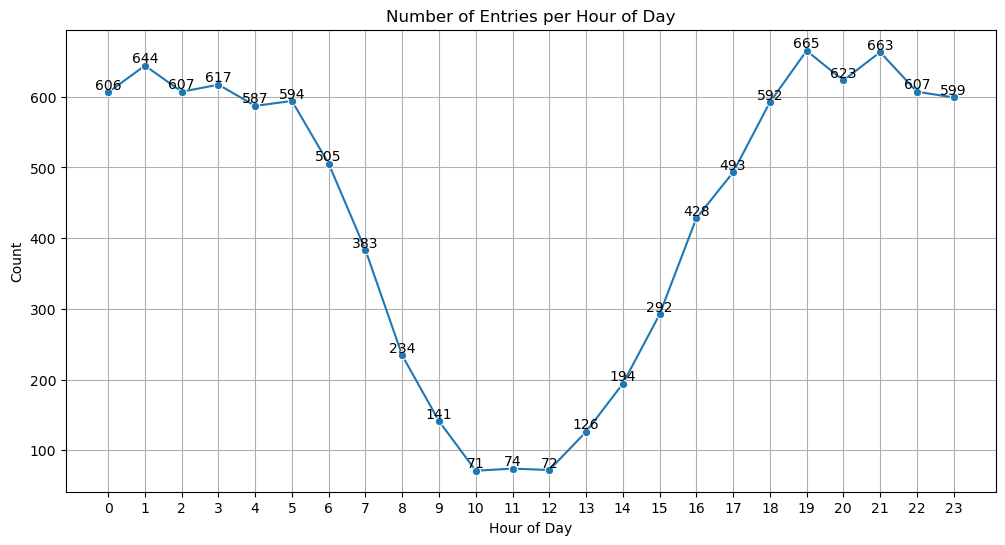

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Saatlerin sayısını hesaplama
hour_counts = df['hour'].value_counts().sort_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')

# Her noktanın üzerine sayıları ekleme
for x, y in zip(hour_counts.index, hour_counts.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('Number of Entries per Hour of Day')
plt.xticks(ticks=range(24))  # Saatleri 0'dan 23'e kadar göster
plt.grid(True)  # Grafik üzerinde ızgara eklemek için
plt.show()

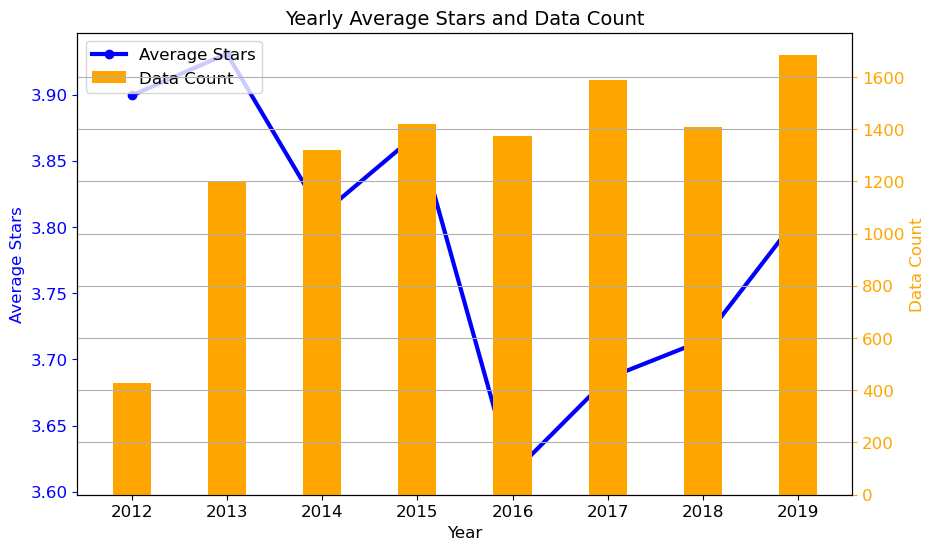

In [174]:

# Convert the 'year' column to numeric
df['year'] = df['year'].astype(int)

# Calculate the average 'stars' value for each year
avg_stars = df.groupby('year')['stars'].mean()

# Calculate the count of data for each year
data_count = df.groupby('year')['stars'].count()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars line graph
ax1.plot(avg_stars.index, avg_stars, color='blue', marker='o', linewidth=3, label='Average Stars')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Stars', color='blue', fontsize=12)
ax1.tick_params('y', colors='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Plot the data count bar graph
ax2 = ax1.twinx()
ax2.bar(data_count.index, data_count, color='orange', width=0.4, label='Data Count')
ax2.set_ylabel('Data Count', color='orange', fontsize=12)
ax2.tick_params('y', colors='orange', labelsize=12)

# Set the legend and grid
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.grid(True)

# Set the title
plt.title('Yearly Average Stars and Data Count', fontsize=14)
plt.show()

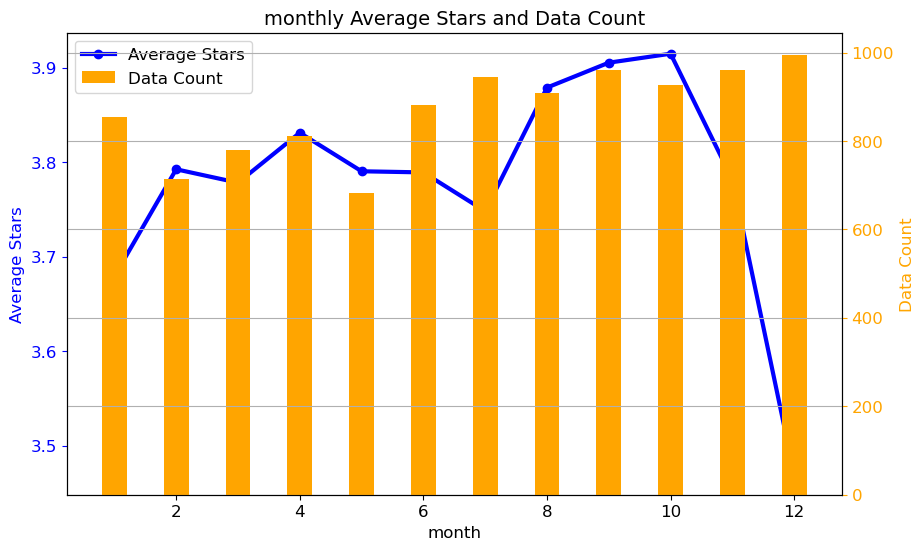

In [175]:
# Convert the 'month' column to numeric
df['month'] = df['month'].astype(int)

# Calculate the average 'stars' value for each month
avg_stars = df.groupby('month')['stars'].mean()

# Calculate the count of data for each month
data_count = df.groupby('month')['stars'].count()

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average stars line graph
ax1.plot(avg_stars.index, avg_stars, color='blue', marker='o', linewidth=3, label='Average Stars')
ax1.set_xlabel('month', fontsize=12)
ax1.set_ylabel('Average Stars', color='blue', fontsize=12)
ax1.tick_params('y', colors='blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Plot the data count bar graph
ax2 = ax1.twinx()
ax2.bar(data_count.index, data_count, color='orange', width=0.4, label='Data Count')
ax2.set_ylabel('Data Count', color='orange', fontsize=12)
ax2.tick_params('y', colors='orange', labelsize=12)

# Set the legend and grid
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)
plt.grid(True)

# Set the title
plt.title('monthly Average Stars and Data Count', fontsize=14)
plt.show()

## TEXT PROCESSING

When starting an NLP project:<br>
1- convert each letter to lowercase<br>
2- punctuation marks left<br>
3- remove digits<br>
4- remove line breaks<br>
5- remove unnecessary words - stopwords<br>
6- tokenize<br>
7- Remove suffixes and find roots with lemma and stemm<br>
8- vectorize<br>

In [178]:
#first four steps of text processing
df['text']=df['text'].str.lower() #küçük harfe çevir
df['text']=df['text'].str.replace('[^\w\s]', ' ',regex=True) #noktalama işaretlerini kaldırır
df['text']=df['text'].str.replace('\n', ' ',regex=True) #satır sonlarını kaldırır
df['text']=df['text'].str.replace('\d+', ' ',regex=True) #rakamları kaldırır
df['text']=df['text'].str.replace('\r', ' ',regex=True) #satır başlarını baldırır

In [190]:
df.sample(2)

,stars,text,year,month,day,hour,day_of_week
8063,4,my girlfriends were leaving vegas a day earlie...,2015,7,20,21,0
835,2,was debating between which buffet to go to wit...,2014,4,21,2,0


In [195]:
#vectorizing, tokenizing and stopwords of df
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer() #stop_words='english',ngram_range=(1,2), max_features = 10000

df2 = df["text"]

tf = pd.DataFrame(vect.fit_transform(df2).toarray(), columns = vect.get_feature_names_out())




In [191]:
def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algoritma:',algo_names[i])
            print('Confusion Matrix:',confusion_matrixes[i])
            print('Classification Report:',classification_reports[i])
            print('Accuracy Score:',accuracy_scores[i])
            print('---*---*---*---*---*---*---*---*---*---*---*---*---*---*')

In [52]:
point=df[(df.stars<3)|(df.stars>3)]

In [55]:
point.sample(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour
7411,2943094,7ZydM1fiVw5_G3EgvU50WA,sYKbn6F4uZcV8cNBr8shqQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,absolutely insane buffet definitely one of t...,2016-11-04 16:14:16,2016,11,4,16
655,2421390,oliOAAGxSfuyZ-ZHxOsZxQ,AaXZ1NdB9hXJy8NpqCwYgQ,RESDUcs7fIiihp38-d6_6g,2,0,0,0,alright i was super excited to try baccahanal...,2014-07-14 15:41:31,2014,7,0,15


In [56]:
def sentiment_label(stars):
    if stars in [1, 2]:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    elif stars in [4, 5]:
        return 'positive'

df['sentiment'] = df['stars'].apply(sentiment_label)

In [58]:
df.sample(2)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,day_of_week,hour,sentiment
8444,3038217,r2JQ19okg23yiw1wN0oQSA,ezuJNo3OG93wBmRchyWAJg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,we went on wednesday evening at like pm and...,2019-11-04 18:33:03,2019,11,0,18,positive
3420,2629111,G3f9mMNOFPQJc9DJLXwM6w,OfdX0DGrAET9jqn_7gkXww,RESDUcs7fIiihp38-d6_6g,5,4,0,1,i think this might be the best overall buffet ...,2015-05-19 21:16:38,2015,5,1,21,positive


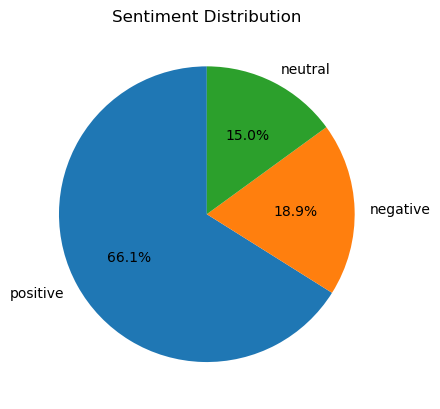

In [67]:
sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

In [68]:
from textblob import TextBlob

In [69]:
TextBlob(df['text'][0]).sentiment

Sentiment(polarity=0.36745179063360883, subjectivity=0.6057024793388429)

In [70]:
# calculate sentiment scores using TextBlob
sentiment_scores = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)